# Results on ViT

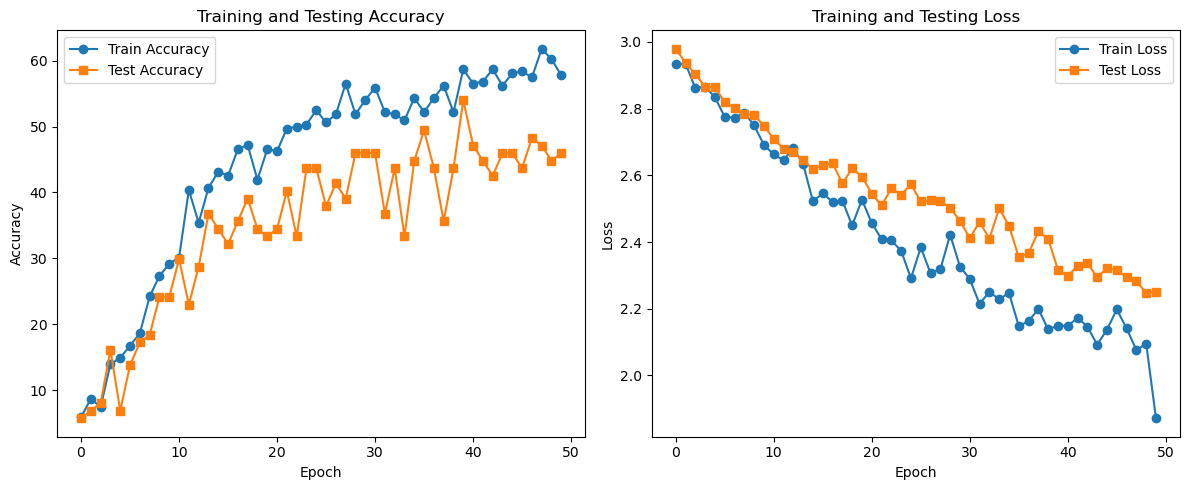

In [3]:
import matplotlib.pyplot as plt
import json

# Load the results from the JSON file (optional)
with open('Results/Vision_Transformer_Bacterial_classification.json', 'r') as json_file:
    pretrained_vit_results = json.load(json_file)

# Extract data for plotting
train_loss = pretrained_vit_results['train_losses']
train_acc = pretrained_vit_results['train_accuracies']
test_loss = pretrained_vit_results['test_losses']
test_acc = pretrained_vit_results['test_accuracies']

# Create subplots for accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training and testing accuracy
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy', marker='o')
plt.plot(test_acc, label='Test Accuracy', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

# Plot training and testing loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss', marker='o')
plt.plot(test_loss, label='Test Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
import torch
import os
import random
from torchvision import transforms
from torchvision import models
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import numpy as np

# Set the device (cuda or cpu)
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the trained model
model_save_path = 'Models/Vision_Transformer_Bacterial_classification.pth'
model_weights = torchvision.models.ViT_B_16_Weights.DEFAULT 
model = models.vit_b_16(weights=model_weights)
model.heads = torch.nn.Linear(768, 19)  # Change the head to match the number of classes
model.load_state_dict(torch.load(model_save_path))
model.to(device)
model.eval()

# Set the path to the folder containing the 19 class subfolders
data_dir = 'Bacteria_Dataset_unzipped'

# Function to load and preprocess an image
def load_and_preprocess_image(img_path, transform):
    img = Image.open(img_path).convert('RGB')
    img = transform(img)
    return img

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, data_dir, num_images_to_select=100, transform=None):
        self.data_dir = data_dir
        self.num_images_to_select = num_images_to_select
        self.transform = transform
        self.class_names = os.listdir(data_dir)
        self.data = []

        for class_name in self.class_names:
            class_dir = os.path.join(data_dir, class_name)
            class_images = os.listdir(class_dir)
            
            # Ensure not to sample more images than available
            num_images = min(self.num_images_to_select, len(class_images))
            sampled_images = random.sample(class_images, num_images)
            
            self.data.extend([(os.path.join(class_dir, img), class_name) for img in sampled_images])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, class_name = self.data[idx]
        img = load_and_preprocess_image(img_path, self.transform)
        return img, class_name

# Create a transform for the test data (you can adjust it according to your training data transformations)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Create a dataset and data loader for the 100 random images
num_images_to_select = 100
test_dataset = CustomDataset(data_dir, num_images_to_select=num_images_to_select, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Initialize counts for correct and wrong predictions
correct_predictions = 0
wrong_predictions = 0

# Make predictions and calculate accuracy
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        true_label = labels[0]
        predicted_label = test_dataset.class_names[predicted[0]]

        if true_label == predicted_label:
            correct_predictions += 1
        else:
            wrong_predictions += 1

# Print the counts of correct and wrong predictions
print("Correct Predictions:", correct_predictions)
print("Wrong Predictions:", wrong_predictions)


Correct Predictions: 113
Wrong Predictions: 296


# Results by AlexNet

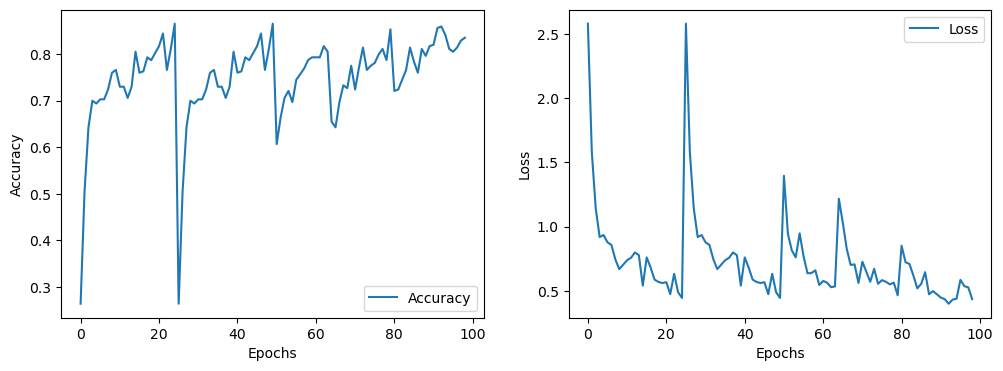

In [21]:
import matplotlib.pyplot as plt
import json

# Load the saved metrics
with open('Results/AI_Alex_Net.json', 'r') as json_file:
    training_metrics = json.load(json_file)

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_metrics['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_metrics['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Results by ResNet50 pretrained

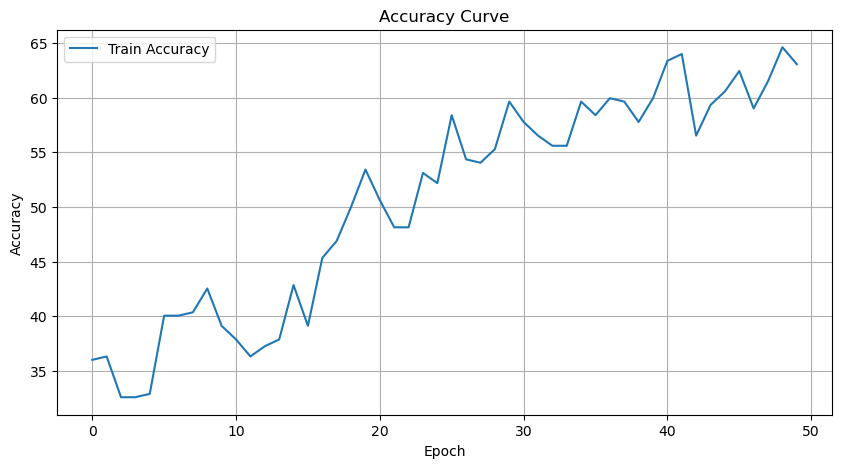

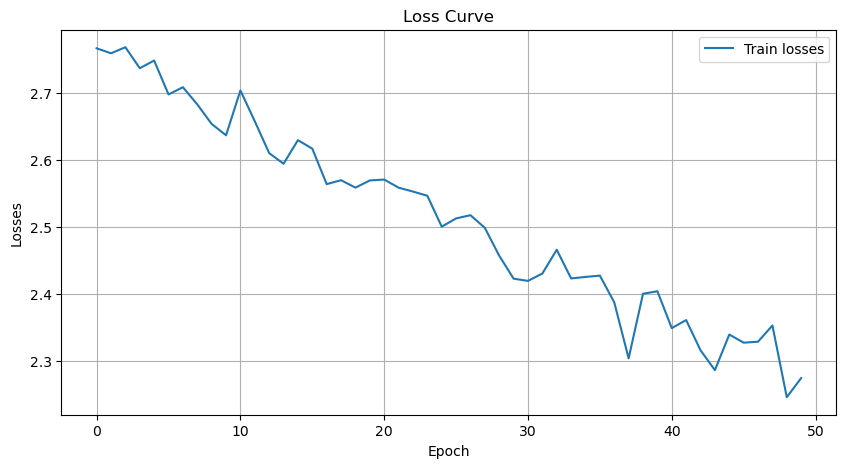

In [17]:
import json
import matplotlib.pyplot as plt

# Load the JSON file
with open('Results/ResNet50_pretrained.json', 'r') as json_file:
    results_dict = json.load(json_file)

# Extract train and test accuracies
train_accuracies = results_dict['train_accuracies']
test_accuracies = results_dict['test_accuracies']
train_losses = results_dict['train_losses']
test_losses=results_dict['test_losses']

# Plot accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
# plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train losses')
# plt.plot(test_losses, label='Test losses')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch import nn
import os
import timm
from torch.autograd import Variable
import matplotlib.pyplot as plt
import random

# Specify your device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

# Set a random seed for reproducibility
random.seed(42)

# Specify the paths to your test dataset
test_dir = 'Bacteria_Dataset_unzipped'

# Define the data transforms for testing
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create an ImageFolder dataset for testing
test_dataset = ImageFolder(test_dir, transform=test_transforms)

# Create a data loader for testing
batch_size = 1  # Predict one image at a time
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load the pre-trained model
model_name = "resnet50"
model = timm.create_model(model_name, pretrained=False)
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Ensure num_classes matches your dataset
model.to(device)

# Load the saved state_dict
model.load_state_dict(torch.load('Models/ResNet50_pretrained.pth'))
model.eval()

# Function to predict images and count correct/wrong predictions
def predict_images(model, test_loader, num_images=100):
    model.eval()
    correct_predictions = 0
    wrong_predictions = 0

    for i, (inputs, labels) in enumerate(test_loader):
        if i >= num_images:
            break
        inputs, labels = inputs.to(device), labels.to(device)
        with torch.no_grad():
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            if predicted == labels:
                correct_predictions += 1
            else:
                wrong_predictions += 1

    return correct_predictions, wrong_predictions

# Call the function to predict 100 images
num_images_to_predict = 100
correct_count, wrong_count = predict_images(model, test_loader, num_images_to_predict)

print(f"Correct Predictions: {correct_count}")
print(f"Wrong Predictions: {wrong_count}")


cuda
Correct Predictions: 72
Wrong Predictions: 28


# ResNet50 from scratch results

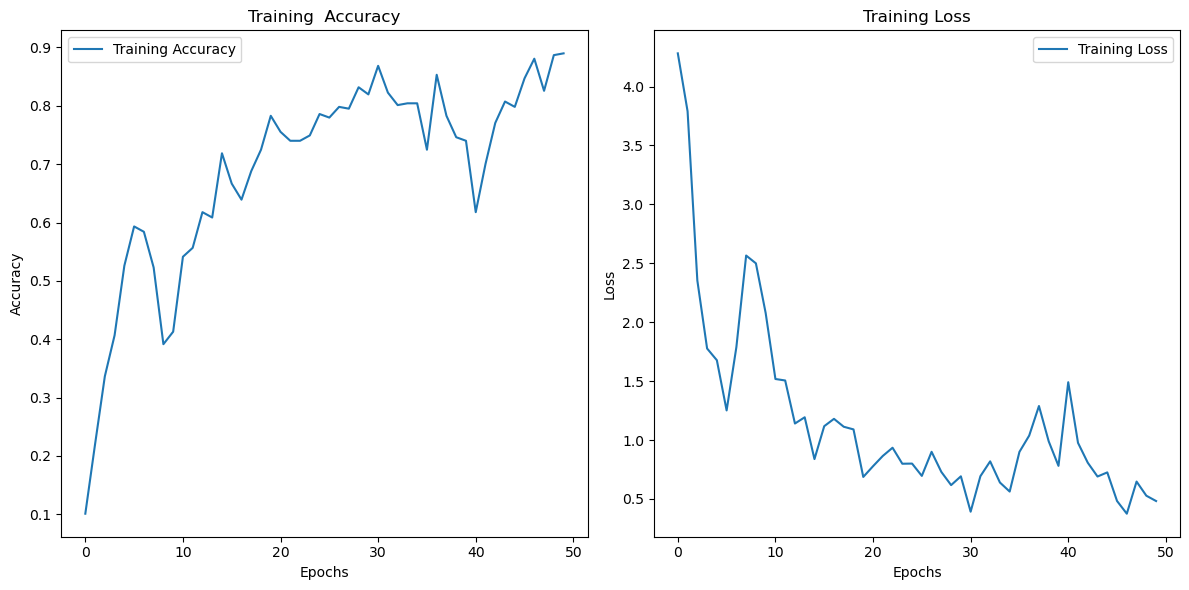

In [53]:
import numpy as np
import cv2
from keras.models import load_model
import json
import random
# from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import os

# Load the saved model
model = load_model('Models/ResNet50_scratch.h5')

# Load the training history
with open('Results/ResNet50_scratch.json', 'r') as json_file:
    history = json.load(json_file)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
# plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training  Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
# plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.tight_layout()
plt.show()




In [55]:
import numpy as np
import os
import cv2
import random  # Add this import
from keras.models import load_model

# Load the ResNet50 model
model = load_model('Models/ResNet50_scratch.h5')

# Set your dataset path
dataset_path = 'Bacteria_Dataset_unzipped'

# Define the number of images to test
num_images_to_test = 100

# Create a list to store image paths and labels
image_paths = []
labels = []

# Loop through the folders and randomly select images
bacteria_types = os.listdir(dataset_path)
for bacteria_type in bacteria_types:
    images_in_folder = os.listdir(os.path.join(dataset_path, bacteria_type))
    random.shuffle(images_in_folder)
    selected_images = images_in_folder[:num_images_to_test]

    for image in selected_images:
        image_path = os.path.join(dataset_path, bacteria_type, image)
        image_paths.append(image_path)
        labels.append(bacteria_type)

# Create a list to store the actual labels and predicted labels
actual_labels = []
predicted_labels = []

# Preprocess and make predictions for the selected images
for image_path, label in zip(image_paths, labels):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64))
    img = np.array(img, dtype='float32') / 255.0
    img = np.expand_dims(img, axis=0)

    # Predict the label for the image
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)

    actual_labels.append(label)
    predicted_labels.append(bacteria_types[predicted_label])

# Calculate the count of correct and wrong predictions
correct_predictions = sum(1 for actual, predicted in zip(actual_labels, predicted_labels) if actual == predicted)
wrong_predictions = num_images_to_test - correct_predictions

# Print the count of correct and wrong predictions
print(f"Correct Predictions: {correct_predictions}")
print(f"Wrong Predictions: {wrong_predictions}")

1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 60ms/step
Correct Predictions: 93
Wrong Predictions: 7
